Langkah 1 — Load dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/sample_data/voice.csv')
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Langkah 2 — Cek dan encode label

In [3]:
df['label'].value_counts()


,count
label,
male,1584
female,1584


In [4]:
df['label'] = df['label'].map({'male': 1, 'female': 0})


Langkah 3 — Pisahkan fitur & label

In [5]:
X = df.drop('label', axis=1)
y = df['label']


Langkah 4 — Split data & Standardization

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Langkah 5 — Train KNN Model pertama

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9810725552050473


Langkah 6 — Mencari nilai k terbaik

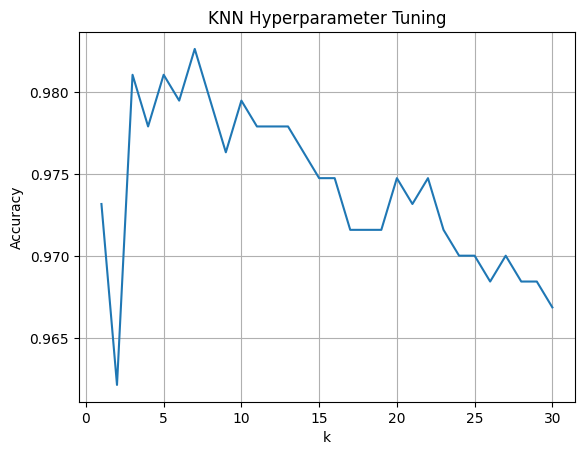

Best k = 7 Accuracy = 0.9826498422712934


In [8]:
import matplotlib.pyplot as plt

k_values = range(1, 31)
acc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, acc_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.grid()
plt.show()

best_k = k_values[acc_scores.index(max(acc_scores))]
print("Best k =", best_k, "Accuracy =", max(acc_scores))


Langkah 7 — Feature Importance (Manual Selection)

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top selected features:\n", selected_features)


Top selected features:
 Index(['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid',
       'meanfun', 'maxdom'],
      dtype='object')
